In [3]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('../data/netflix_titles.csv')

# Display the first few rows of the dataset to understand its structure
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Check data types and the number of non-null values in each column
df.info()

# Check for missing values in each column
df.isnull().sum()

# Get the summary statistics for numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Display the number of missing values after dropping
df_cleaned.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Convert 'release_year' to datetime (keeping only the year part)
df['release_year'] = pd.to_datetime(df['release_year'], format='%Y', errors='coerce').dt.year

# Check the data types after conversion
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int32
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [13]:
# Extract month and day of the week from 'date_added'
df['month_added'] = df['date_added'].dt.month
df['day_of_week_added'] = df['date_added'].dt.day_name()

# Show the new columns
df[['date_added', 'month_added', 'day_of_week_added']].head()

,date_added,month_added,day_of_week_added
0,2021-09-25,9.0,Saturday
1,2021-09-24,9.0,Friday
2,2021-09-24,9.0,Friday
3,2021-09-24,9.0,Friday
4,2021-09-24,9.0,Friday


C:\Users\ax_va\AppData\Local\Temp\ipykernel_29312\1468848207.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


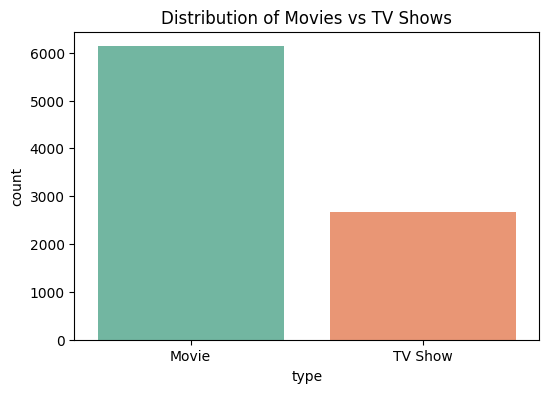

In [15]:
# Plot the distribution of Movies vs TV Shows
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Distribution of Movies vs TV Shows')
plt.show()

C:\Users\ax_va\AppData\Local\Temp\ipykernel_29312\3074395854.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', palette='Blues', order=df['rating'].value_counts().index)


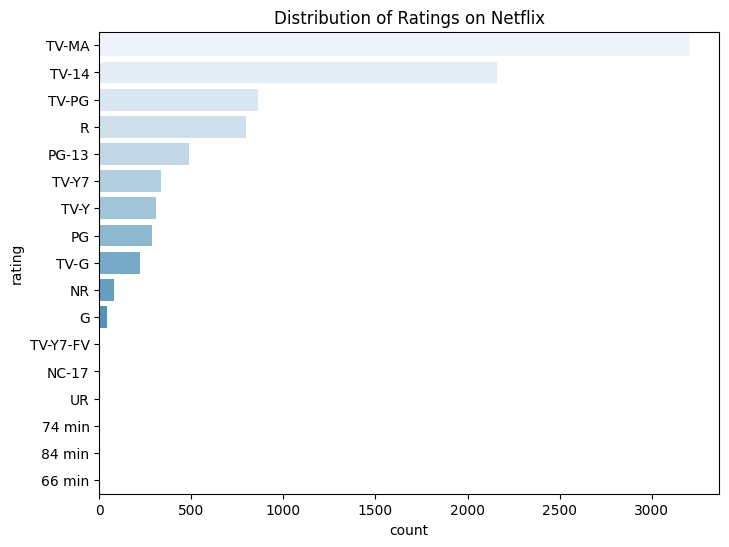

In [17]:
# Plot distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='rating', palette='Blues', order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings on Netflix')
plt.show()

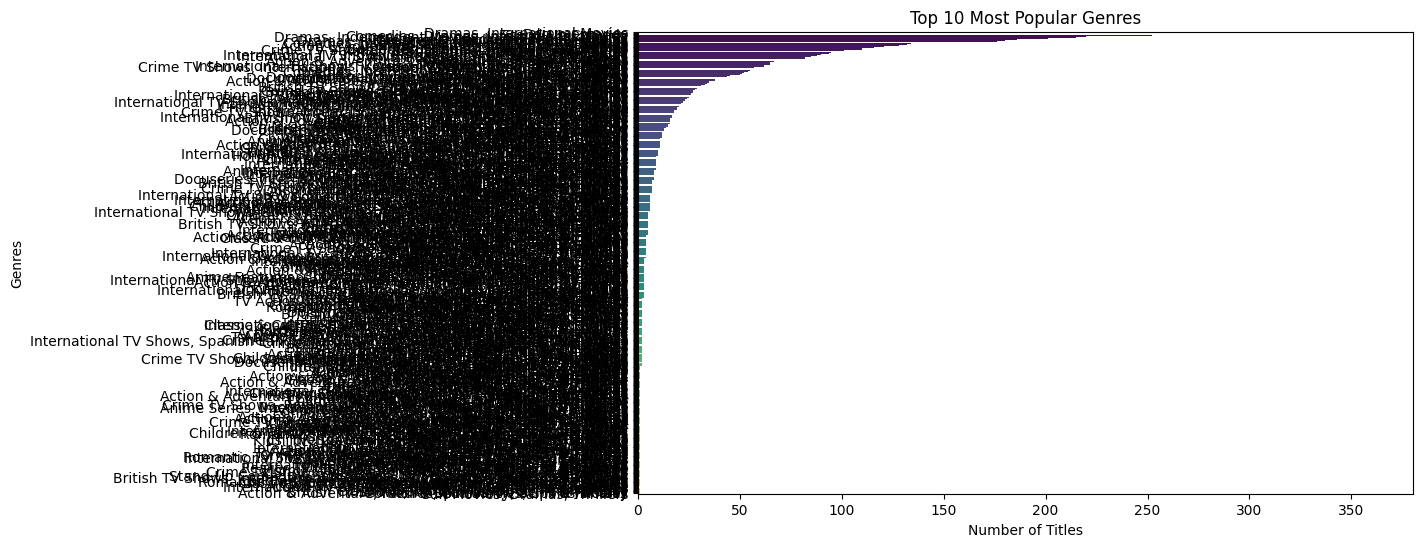

In [21]:
# Count genres
genres = df['listed_in'].explode().value_counts()

# Plot the top genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genres.values, y=genres.index, hue=genres.index, palette='viridis', legend=False)
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.show()

In [23]:
df.to_csv('../data/netflix_titles_cleaned.csv', index=False)